<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/Practice_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/dataset.csv',header=1)

# Display the first few rows to ensure it's loaded correctly
print("First 5 rows of the dataset:")
print(data.head())

# Verify the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)  # Expected output: (number_of_samples, 4)


First 5 rows of the dataset:
   0.3747068090620485  5.790314013039136  11.50372825206635  \
0           -0.079608           6.237469          10.896189   
1           -0.081119           5.701018          10.667082   
2           -0.126346           5.909102          11.284062   
3           -0.189288           5.975939          10.936263   
4           -0.367618           6.761488          11.627896   

   1.0587130917309429  
0            2.544234  
1            1.763362  
2            1.677921  
3            1.048724  
4            1.906578  

Shape of the dataset:
(1499, 4)


In [ ]:
import numpy as np
import pandas as pd

# Convert the DataFrame to a NumPy array
X = data.values

# 1. Center the data
X_centered = X - np.mean(X, axis=0)

# 2. Calculate the covariance matrix
covariance_matrix = np.cov(X_centered.T)

# 3. Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# 4. Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


# 5. Select the top 2 eigenvectors
principal_components = sorted_eigenvectors[:, :2]

# 6. Project the data
data_2d = X_centered @ principal_components

# Verify the shape
print("Reduced Data Shape:", data_2d.shape)

Reduced Data Shape: (1499, 2)


[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
[0.09753159 0.08694377 0.07393142]
[[ 0.36310609  0.54821599  0.75340109]
 [ 0.89784554 -0.42200161 -0.12565041]
 [-0.24905291 -0.72206224  0.64544463]]
u [[0.35948802 0.95322466 0.71909869]
 [0.66126009 0.1455781  0.20962581]]
Top Eigenvalues: [0.09753159 0.08694377]
Top Eigenvectors:
 [[ 0.36310609  0.54821599]
 [ 0.89784554 -0.42200161]
 [-0.24905291 -0.72206224]]
Projected Data Shape: (100, 2)


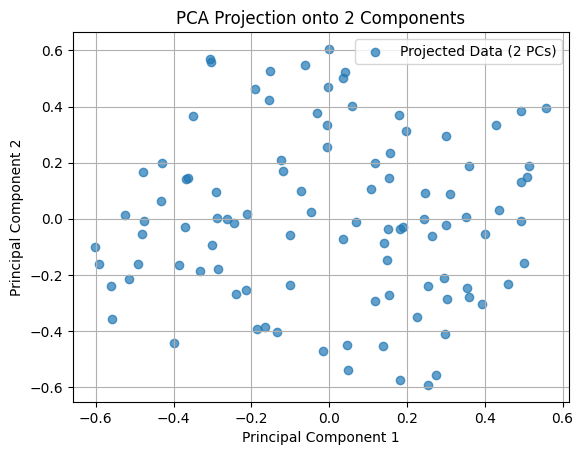

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# PCA Function
def PCA(X, num_components):
    """
    Perform PCA according to the steps in the image:
    1. Compute the mean of the data.
    2. Compute the covariance matrix.
    3. Get the top M eigenvalues and eigenvectors.
    4. Project the data onto the principal components.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features).
        num_components (int): Number of principal components to retain.

    Returns:
        projected_data (numpy.ndarray): Data projected onto the principal components.
        eigenvalues (numpy.ndarray): Top M eigenvalues.
        eigenvectors (numpy.ndarray): Corresponding eigenvectors.
        reconstructed_data (numpy.ndarray): Reconstructed data from the projection.
    """
    # Step 1: Calculate the mean of the data
    print(X[:2])
    X_mean = np.mean(X, axis=0)  # Mean of each feature (D-dimensional)
    X_centered = X - X_mean  # Center the data

    # Step 2: Compute the covariance matrix
    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.dot(X_centered.T, X_centered)

    # Step 3: Get the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    print(eigenvalues)
    print(eigenvectors)

    # Step 5: Select the top 'num_components' eigenvalues and eigenvectors
    top_eigenvalues = eigenvalues[:num_components]
    top_eigenvectors = eigenvectors[:, :num_components]

    # Step 6: Project the data onto the principal components
    projected_data = np.dot(X_centered, top_eigenvectors)


    # Step 7: Reconstruct the original data from the projection
    reconstructed_data = np.dot(projected_data, top_eigenvectors.T) + X_mean

    print("u",reconstructed_data[:2])
    return projected_data, top_eigenvalues, top_eigenvectors, reconstructed_data


# Example Usage
if __name__ == "__main__":
    # Step 1: Generate synthetic data (100 samples, 3 features)
    np.random.seed(42)
    X = np.random.rand(100, 3)  # Shape (100, 3)

    # Step 2: Perform PCA with 2 principal components
    num_components = 2
    projected_data, top_eigenvalues, top_eigenvectors, reconstructed_data = PCA(X, num_components)

    # Step 3: Print results
    print("Top Eigenvalues:", top_eigenvalues)
    print("Top Eigenvectors:\n", top_eigenvectors)
    print("Projected Data Shape:", projected_data.shape)

    # Step 4: Visualize the projection if num_components = 2
    if num_components == 2:
        plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7, label="Projected Data (2 PCs)")
        plt.title("PCA Projection onto 2 Components")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend()
        plt.grid()
        plt.show()


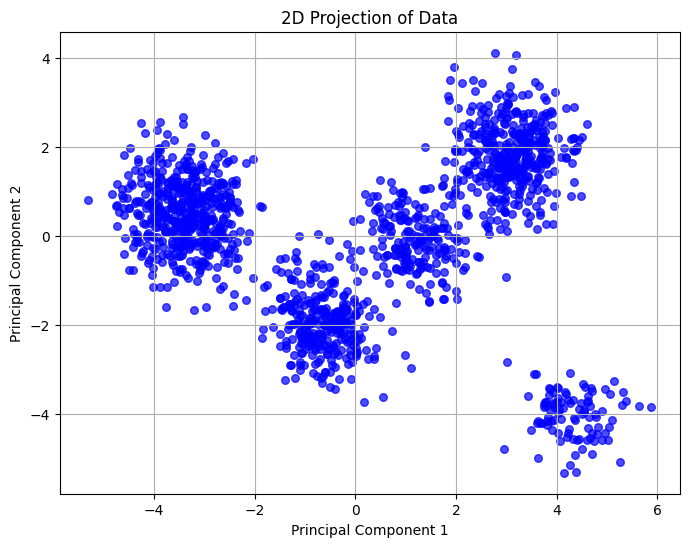

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=30, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
X=data_2d

In [ ]:
init_centroids = np.array([[-3, -3], [6, 2], [2,-1], [-2,1], [4, -1]])


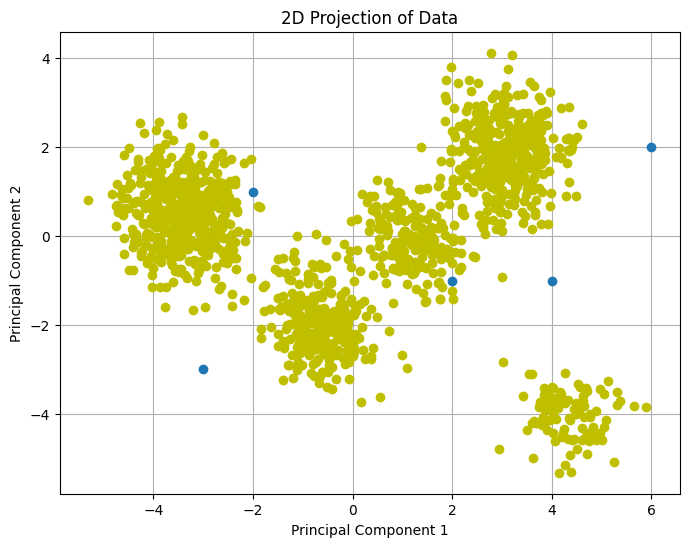

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.plot(X[:,0],X[:,1], 'yo')
plt.plot(init_centroids[:,0],init_centroids[:,1], 'o')
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
def find_closest_centroids(X, centroids):
  K=centroids.shape[0]
  print(K)
  idx=np.zeros((X.shape[0],1))
  print(idx.shape)
  for i in range(X.shape[0]):
    min_distance=np.inf
    for j in range(K):
      distance=np.linalg.norm(X[i]-centroids[j])
      if distance<min_distance:
        min_distance=distance
        idx[i]=j
  return idx
idx=find_closest_centroids(X,init_centroids)

5
(1499, 1)


In [ ]:
m,n=X.shape
print(m,n)

1499 2


In [ ]:
def compute_centroids(X, idx, K):

  centroids = np.zeros((K,X.shape[1]))
  for k in range(K):
    cent=[]
    for i in range(m):
      if idx[i]==k:
        cent.append(X[i])

    centroids[k]=np.mean(cent,axis=0)

  return centroids
compute_centroids(X,idx,5)

array([[-1.22500021, -2.0953008 ],
       [ 3.37601195,  2.34331744],
       [ 1.30820855, -0.06720576],
       [-3.19290439,  0.50485515],
       [ 3.90760594, -1.82156476]])

In [ ]:
def plotkMeans(idx,num_CL,C_H,it):
    colors = ('b','g','r','c','m','y','k')

    plt.figure
    for i in range(num_CL):
        CL_i = X[np.where(idx == i)[0],:]
        plt.plot(CL_i[:,0],CL_i[:,1], colors[i]+'o',)
        plt.plot(C_H[i,0,0:it+2],C_H[i,1,0:it+2],'kx-')

    plt.show()
    return 0

def runkMeans(X,init_cents,max_iters,plotProgress= False):

    m, n = X.shape
    k = init_cents.shape[0]
    idx = np.zeros((m))
    centroids = init_cents
    cent_hist = np.zeros((init_cents.shape[0],init_cents.shape[1],max_iters+1))
    cent_hist[:,:,0] = init_cents

    # K-Means:
    for i in range(max_iters):

        print('Running the {} iteration of {}'.format(i+1,max_iters))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        cent_hist[:,:,i+1] = centroids
        if plotProgress:
            plotkMeans(idx,init_cents.shape[0],cent_hist,i)

    return centroids, idx

Running the 1 iteration of 5
5
(1499, 1)


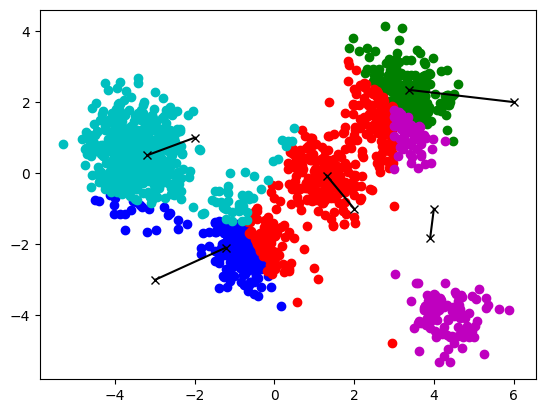

Running the 2 iteration of 5
5
(1499, 1)


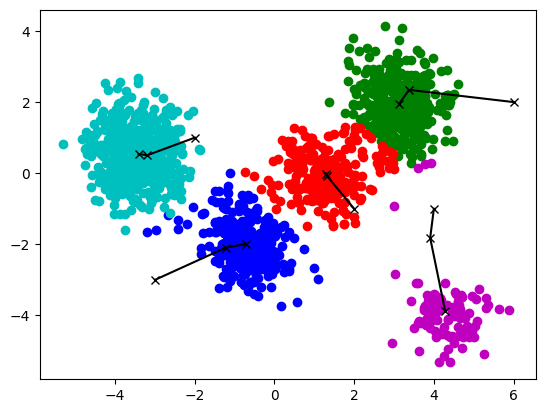

Running the 3 iteration of 5
5
(1499, 1)


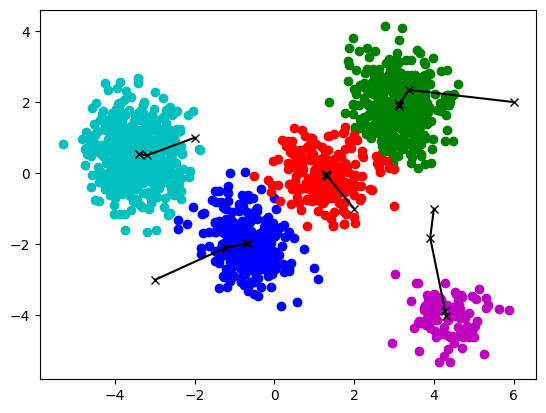

Running the 4 iteration of 5
5
(1499, 1)


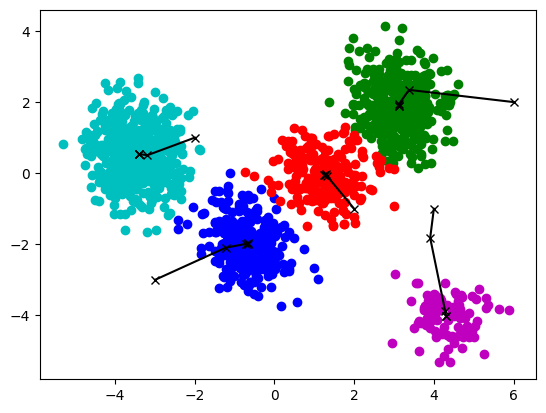

Running the 5 iteration of 5
5
(1499, 1)


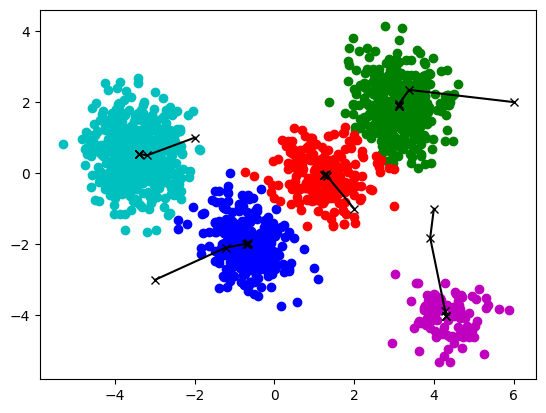

In [ ]:
K=5
max_iters=5
final_centroids, final_idx = runkMeans(data_2d, init_centroids, max_iters, plotProgress=True)